In [2]:
# Dependencies and Setup
import pandas as pd

# File to Load (Remember to Change These)
file_to_load = "Resources/purchase_data.csv"

# Read Purchasing File and store into Pandas data frame
purchase_data = pd.read_csv(file_to_load)

In [3]:
player_sn_distinct = purchase_data['SN'].unique()

In [4]:
total_player_cnt = len(player_sn_distinct)

In [5]:
total_player_cnt_dict = ({'Total Players':[total_player_cnt]})

In [6]:
ans_df = pd.DataFrame(total_player_cnt_dict, index=['count'])

## Player Count

* Display the total number of players


In [7]:
ans_df

,Total Players
count,576


## Purchasing Analysis (Total)

* Run basic calculations to obtain number of unique items, average price, etc.


* Create a summary data frame to hold the results


* Optional: give the displayed data cleaner formatting


* Display the summary data frame


In [8]:
purchase_data.head()

,Purchase ID,SN,Age,Gender,Item ID,Item Name,Price
0,0,Lisim78,20,Male,108,"Extraction, Quickblade Of Trembling Hands",3.53
1,1,Lisovynya38,40,Male,143,Frenzied Scimitar,1.56
2,2,Ithergue48,24,Male,92,Final Critic,4.88
3,3,Chamassasya86,24,Male,100,Blindscythe,3.27
4,4,Iskosia90,23,Male,131,Fury,1.44


In [9]:
#Unique Item Count:
dist_item_cnt = len(purchase_data['Item ID'].unique())
print(f'There are {dist_item_cnt} unique items.')

There are 179 unique items.


In [10]:
#Average Purchase Price
price_avg = purchase_data['Price'].mean()
str_price_avg = '${:,.2f}'.format(price_avg)
print(f'The average purchase price is {str_price_avg}.')

The average purchase price is $3.05.


In [11]:
#count of purchases
Purchase_cnt = len(purchase_data)  #assumes each row in csv represents exactly one purchase
print(f'The count of purchases is: {Purchase_cnt}')

The count of purchases is: 780


In [12]:
#Curious if any purchase ID's are repeated (would indicate >1 item per purchase)
len(purchase_data['Purchase ID'].unique())

780

In [13]:
#Total Revenue
TotalRevenue = purchase_data['Price'].sum()
strRevenue_sum = '${:,.2f}'.format(TotalRevenue)
print(f'Total Revenue is: {strRevenue_sum}')

Total Revenue is: $2,379.77


In [15]:
dfPurchaseSummary = pd.DataFrame({
                                  'Unique Items': dist_item_cnt, 
                                  'Average Purchase':str_price_avg, 
                                  'Purchase Count':Purchase_cnt, 
                                  'Total Revenue':strRevenue_sum
                                 }, 
                                 index=["Value"])
dfPurchaseSummary

,Unique Items,Average Purchase,Purchase Count,Total Revenue
Value,179,$3.05,780,"$2,379.77"


## Gender Demographics

* Percentage and Count of Male Players


* Percentage and Count of Female Players


* Percentage and Count of Other / Non-Disclosed




In [16]:
#purchase_data.csv is at the purchase level, and one player (Identified by SN column) may have multiple purchases.
#strategy: 
#ASSUMPTION: each SN has exactly one distinct Gender value.
    # 1. create new dataframe with only SN and Gender columns.
    # 2. Group by SN and return min of Gender. 
    
    
dfSNGender = purchase_data[['SN','Gender']].copy()
dfSNG2 = dfSNGender.groupby('SN').max()
len(dfSNG2) == total_player_cnt #if True then the above ASSUMPTION is valid. 
                                #to-do: implement flow control such that error is raised when this is False.
    

True

In [17]:
#technique from: https://blog.softhints.com/pandas-count-percentage-value-column/
#verified via: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html    
    #both pages retrieved 2021-01-16

s = dfSNG2.Gender
counts = s.value_counts()
percentage = s.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

dfGender = pd.DataFrame({'Count':counts, 'PercentOfTotal':percentage})
dfGender



,Count,PercentOfTotal
Male,484,84.0%
Female,81,14.1%
Other / Non-Disclosed,11,1.9%



## Purchasing Analysis (Gender)

* Run basic calculations to obtain:
    * purchase count, 
    * avg. purchase price,
    * Total Purchase Amt
    * avg. purchase total per person 
           Above Broken out by Gender




* Create a summary data frame to hold the results


* Optional: give the displayed data cleaner formatting


* Display the summary data frame

In [18]:
#Will Need only Gender, Price columns. Throwing in SN as a field to run count against
dfPurchaseByGender = purchase_data[['Gender','SN','Price']].copy()

#Strategy: 
    #Get purchase count as count of SN; avg purchase as mean of price; total purchase amt as sum of price
group = dfPurchaseByGender.groupby(['Gender'])
dfByGender = group.agg({'SN':['count'],'Price':['sum','mean']})

    #Append counts series from above step
dfAppended = dfByGender.join(dfGender)
dfAppended.columns

#drop unneccesary pct of total column
columns_to_keep = [('SN', 'count'), ('Price', 'sum'), ('Price', 'mean'), 'Count']

dfDropped = dfAppended[columns_to_keep]

    #rename columns to make them more meaningful
dfDropped.rename(columns = {('SN', 'count'):"Purchase_Count",
                            ('Price', 'sum'):'Total_Revenue',
                            ('Price', 'mean'):'Avg_Purchase',
                            'Count':'Player_cnt'
                           }, inplace=True)
    #Calculate Average Price per person
dfDropped['Avg_Revenue_per_Player'] = dfDropped.Total_Revenue/dfDropped.Player_cnt
dfDropped


C:\Users\Test\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:643: UserWarning: merging between different levels can give an unintended result (2 levels on the left,1 on the right)
  warnings.warn(msg, UserWarning)
C:\Users\Test\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
C:\Users\Test\anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Purchase_Count,Total_Revenue,Avg_Purchase,Player_cnt,Avg_Revenue_per_Player
Gender,,,,,
Female,113,361.94,3.203009,81,4.468395
Male,652,1967.64,3.017853,484,4.065372
Other / Non-Disclosed,15,50.19,3.346000,11,4.562727


## Age Demographics

* Establish bins for ages


* Categorize the existing players using the age bins. Hint: use pd.cut()


* Calculate the numbers and percentages by age group


* Create a summary data frame to hold the results


* Optional: round the percentage column to two decimal points


* Display Age Demographics Table


In [19]:
columns_to_keep = ['SN','Age']

df1 = purchase_data[columns_to_keep]
dfSN_Age = df1.groupby('SN').max()

Bins = [0,10,15,20,25,30,35,40,purchase_data['Age'].max()]

dfSN_Age['Age_Bin'] = pd.cut(dfSN_Age['Age'], Bins)

dfAgeBinned = dfSN_Age.groupby('Age_Bin').count()

dfPlayersByAge = dfAgeBinned.rename(columns = {'Age':'Player_cnt'})

dfPlayersByAge['Percent of Total'] = round(dfPlayersByAge['Player_cnt']/total_player_cnt*100,2).astype(str) + '%'

dfPlayersByAge

,Player_cnt,Percent of Total
Age_Bin,,
"(0, 10]",24,4.17%
"(10, 15]",41,7.12%
"(15, 20]",150,26.04%
"(20, 25]",232,40.28%
"(25, 30]",59,10.24%
"(30, 35]",37,6.42%
"(35, 40]",26,4.51%
"(40, 45]",7,1.22%


#### Create chart of the above summary

In [1]:
#matplotlib set up and 538 style
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [21]:
dfSN_Age.head()

,Age,Age_Bin
SN,,
Adairialis76,16,"(15, 20]"
Adastirin33,35,"(30, 35]"
Aeda94,17,"(15, 20]"
Aela59,21,"(20, 25]"
Aelaria33,23,"(20, 25]"


In [32]:
x = dfSN_Age.Age
hist_bins = [11,16,21,26,31,36,41,45]

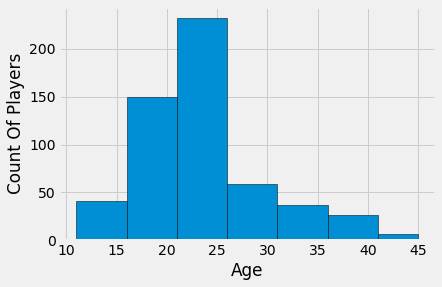

In [33]:
plt.hist(x, bins=hist_bins, ec="black")
plt.xlabel("Age")
plt.ylabel("Count Of Players")
plt.show()

## Purchasing Analysis (Age)

* Bin the purchase_data data frame by age


* Run basic calculations to obtain purchase count, avg. purchase price, avg. purchase total per person etc. in the table below


* Create a summary data frame to hold the results


* Optional: give the displayed data cleaner formatting


* Display the summary data frame

In [35]:
#Create a copy of the dataframe with abbreviated name
df = purchase_data

#Use same bins as those in Age Demographics section
df['Age_Bin'] = pd.cut(df['Age'], Bins)

#Establish Group By 
grp_Bin = df.groupby('Age_Bin')


#Aggregate
dfByAge1 = grp_Bin.agg({'SN':['count'],'Price':['sum']})

#Pretty up the column names
dfByAge1.columns = dfByAge1.columns.to_series().apply(''.join)
dfByAge2 = dfByAge1.rename(columns = {'SNcount':  'Purchase_Cnt'
                                     ,'Pricesum': 'Total_Revenue'   
                                     })
#Calculate Avg Purchase column
dfByAge2['Avg_Purchase'] = round(dfByAge2['Total_Revenue']/dfByAge2['Purchase_Cnt'],2)

#Bring in player counts
df3 = dfByAge2.join(dfAgeBinned)
df4 = df3.rename(columns={'Age':'Player_Cnt'})

#Calculate Avg Revenue per Player column
df4['Avg_Revenue_per_Player'] = round(df4['Total_Revenue']/df4['Player_Cnt'],2)

df4

,Purchase_Cnt,Total_Revenue,Avg_Purchase,Player_Cnt,Avg_Revenue_per_Player
Age_Bin,,,,,
"(0, 10]",32,108.96,3.40,24,4.54
"(10, 15]",54,156.60,2.90,41,3.82
"(15, 20]",200,621.56,3.11,150,4.14
"(20, 25]",325,981.64,3.02,232,4.23
"(25, 30]",77,221.42,2.88,59,3.75
"(30, 35]",52,155.71,2.99,37,4.21
"(35, 40]",33,112.35,3.40,26,4.32
"(40, 45]",7,21.53,3.08,7,3.08


## Top Spenders

* Run basic calculations to obtain the results in the table below


* Create a summary data frame to hold the results


* Sort the total purchase value column in descending order


* Optional: give the displayed data cleaner formatting


* Display a preview of the summary data frame



In [36]:
#Calculate purchase counts and total revenue
df_TopSpend = df.groupby('SN').agg({'Item ID':['count']
                                    ,'Price':['sum']
                                   })
#Pretty up the column names
df_TopSpend.columns = df_TopSpend.columns.to_series().apply(''.join)
df_Top_Rnm = df_TopSpend.rename(columns = {'Item IDcount':  'Purchase_Cnt',
                                     'Pricesum': 'Total_Revenue'   
                                     })

#Add calculated column for Avg_Purchase
df_Top_Rnm['Avg_Purchase']= round(df_Top_Rnm['Total_Revenue']/df_Top_Rnm['Purchase_Cnt'],2)

#Sort by Total_Revenue descending
df_Top_Rnm.sort_values(by=['Total_Revenue'],ascending = False).head(5)

,Purchase_Cnt,Total_Revenue,Avg_Purchase
SN,,,
Lisosia93,5,18.96,3.79
Idastidru52,4,15.45,3.86
Chamjask73,3,13.83,4.61
Iral74,4,13.62,3.40
Iskadarya95,3,13.10,4.37


## Most Popular Items

* Retrieve the Item ID, Item Name, and Item Price columns


* Group by Item ID and Item Name. Perform calculations to obtain purchase count, average item price, and total purchase value


* Create a summary data frame to hold the results


* Sort the purchase count column in descending order


* Optional: give the displayed data cleaner formatting


* Display a preview of the summary data frame



In [48]:
#Rerieve Columns
columns_to_keep = ['Item ID','Item Name','SN','Price']

df1 = df[columns_to_keep]
df1.head()

#Group by Item ID, Item Name
groups = df1.groupby(['Item ID','Item Name'])

#Calc aggregate stats
df2 = groups.agg({'SN':'count'
                  ,'Price':'sum'
    
                  })
#Pretty up the column names
df2.columns = df2.columns.to_series().apply(''.join)
df3 = df2.rename(columns = {'SN':'Purchase_Cnt','Price':'Total_Revenue'})

#Sort by Item_Cnt & display top 5
df4 = df3.sort_values(by=['Total_Revenue'],ascending = False)
df4['Avg_Price'] = round(df4['Total_Revenue']/df4['Purchase_Cnt'],2)

pd.options.display.float_format='${:,.2f}'.format  ###format floats as currency
df4.head(5)

,,Purchase_Cnt,Total_Revenue,Avg_Price
Item ID,Item Name,,,
92,Final Critic,13,$59.99,$4.61
178,"Oathbreaker, Last Hope of the Breaking Storm",12,$50.76,$4.23
82,Nirvana,9,$44.10,$4.90
145,Fiery Glass Crusader,9,$41.22,$4.58
103,Singed Scalpel,8,$34.80,$4.35


## Most Profitable Items

* Sort the above table by total purchase value in descending order


* Optional: give the displayed data cleaner formatting


* Display a preview of the data frame



In [44]:
df5 = df4.sort_values(by=['Total_Revenue'], ascending=False)
pd.options.display.float_format = '${:,.2f}'.format
df5.head(5)

,,Purchase_Cnt,Total_Revenue,Avg_Price
Item ID,Item Name,,,
92,Final Critic,13,$59.99,$4.61
178,"Oathbreaker, Last Hope of the Breaking Storm",12,$50.76,$4.23
82,Nirvana,9,$44.10,$4.90
145,Fiery Glass Crusader,9,$41.22,$4.58
103,Singed Scalpel,8,$34.80,$4.35


## Written Analysis

1. Top 5 highest grossing, and top 5 most purchased, reflect the same top items. This suggests low variance over the purchase count by item distribution. This indicates price optimization across items, because mis-pricing would reveal differences between top 5 by revenue and top 5 most purchased, as very low priced items would rise in quantity purchased, while very high priced items would be purchased less frequently. 

2. Demographics show that most of the players are male. Age range distribution peaks over 15-25 years of age. This indicates the game appeals most to young male players. 

3. Total Revenue by age and gender reveal similar trends. This points to a low variance across avgerage revenue per player, regardless of demographic profile. This points to potential opportunity in attracting a larger following by increasing the appeal of the game to females or underrepresented age groups. These demographics would be the easiest to target, and since average revenue per player is very similar, would be the best way to grow revenue.  